In [35]:
import numpy as np
import openpyxl

In [69]:
from scipy.stats import kstest, shapiro
#cdf中可以指定要检验的分布，norm表示我们需要检验的是正态分布
#常见的分布包括norm,logistic,expon,gumbel等

构建json用于存储数据

In [102]:
configs = {
    "铅钡": {
        "xlsx": "铅钡玻璃化学成分.xlsx",
        "row": 50,
        "fenghua_col": "T",
        "list": ["B", "C", "E", "J", "L", "M"],
        "names": [],
        "data": {
            "风化": [],
            "无风化": [],
        },
    },
    "高钾": {
        "xlsx": "高钾玻璃化学成分.xlsx",
        "row": 19,
        "fenghua_col": "R",
        "list": ["B", "D", "E", "F", "G", "H"],
        "names": [],
        "data": {
            "风化": [],
            "无风化": [],
        },
    }
}
# 同时包括风化与无风化，铅钡和高钾，总计四类

In [103]:
for category in configs:
    new_configs = configs[category]
    vb = openpyxl.load_workbook(new_configs["xlsx"])
    sheet = vb["Sheet1"]
    n_row = new_configs["row"]
    for column_name in new_configs["list"]:
        # 分别记录风化和无风化两种数据
        fenghua = []
        unfenghua = []
        new_configs["names"].append(sheet[column_name + "1"].value)
        fenghua_col = new_configs["fenghua_col"]
        for row in range(2, n_row+1):
            if sheet[fenghua_col+str(row)].value == "风化":
                fenghua.append(sheet[column_name + str(row)].value)
            else:
                unfenghua.append(sheet[column_name + str(row)].value)
        
        new_configs["data"]["风化"].append(fenghua)
        new_configs["data"]["无风化"].append(unfenghua)

configs

{'铅钡': {'xlsx': '铅钡玻璃化学成分.xlsx',
  'row': 50,
  'fenghua_col': 'T',
  'list': ['B', 'C', 'E', 'J', 'L', 'M'],
  'names': ['二氧化硅(SiO2)',
   '氧化钠(Na2O)',
   '氧化钙(CaO)',
   '氧化铅(PbO)',
   '五氧化二磷(P2O5)',
   '氧化锶(SrO)'],
  'data': {'风化': [[28.79,
     17.98,
     29.15,
     25.42,
     36.28,
     33.59,
     12.41,
     21.7,
     24.61,
     21.35,
     25.74,
     22.28,
     17.11,
     18.46,
     35.78,
     39.57,
     32.93,
     26.25,
     20.14,
     4.61,
     19.79,
     3.72,
     29.64,
     53.33,
     16.71,
     30.39],
    [0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     1.22,
     0,
     0,
     0,
     0,
     2.22,
     1.38,
     0,
     0,
     0,
     0,
     0,
     0,
     0.8,
     0,
     0],
    [4.58,
     3.19,
     1.21,
     1.31,
     2.34,
     3.51,
     5.24,
     6.4,
     3.58,
     5.13,
     2.27,
     3.19,
     0,
     4.96,
     0.78,
     0.37,
     0.68,
     1.11,
     1.48,
     3.19,
     1.44,
     3.01,
  

画出所有风化敏感型变量分布的图像，包括符合正态分布的和不符合正态分布的

铅钡 风化 二氧化硅(SiO2) p=0.66


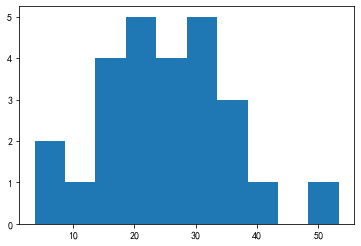

铅钡 风化 氧化钠(Na2O) p=0.00


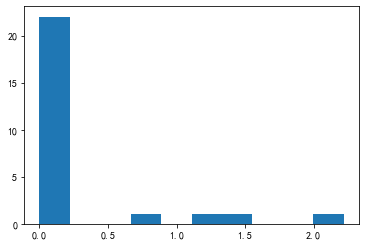

铅钡 风化 氧化钙(CaO) p=0.52


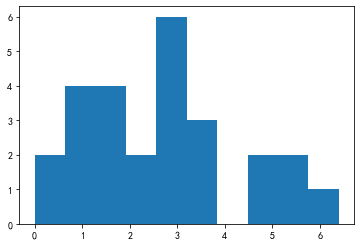

铅钡 风化 氧化铅(PbO) p=0.96


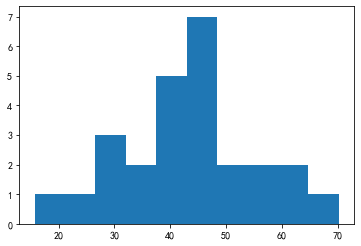

铅钡 风化 五氧化二磷(P2O5) p=0.11


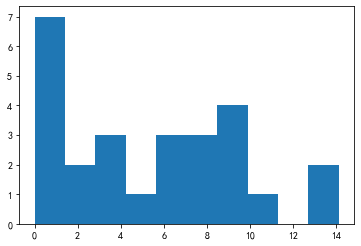

铅钡 风化 氧化锶(SrO) p=0.34


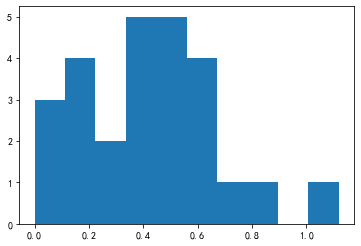

铅钡 无风化 二氧化硅(SiO2) p=0.48


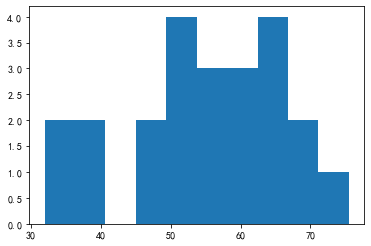

铅钡 无风化 氧化钠(Na2O) p=0.00


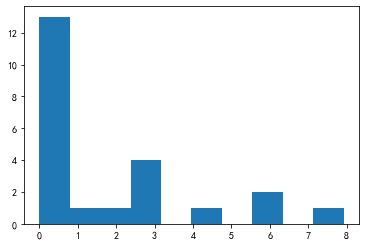

铅钡 无风化 氧化钙(CaO) p=0.00


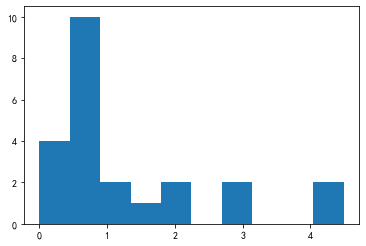

铅钡 无风化 氧化铅(PbO) p=0.22


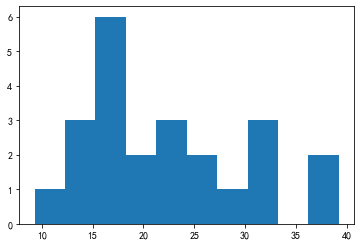

铅钡 无风化 五氧化二磷(P2O5) p=0.00


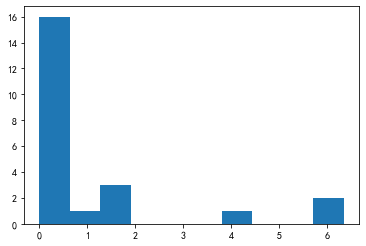

铅钡 无风化 氧化锶(SrO) p=0.00


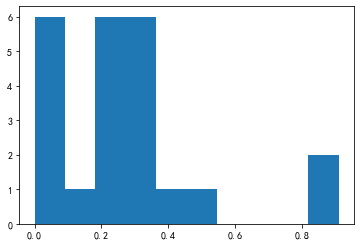

高钾 风化 二氧化硅(SiO2) p=0.30


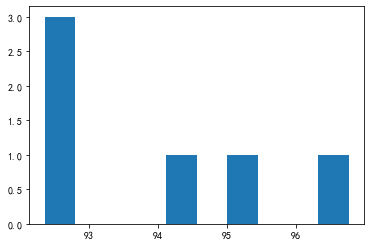

高钾 风化 氧化钾(K2O) p=0.18


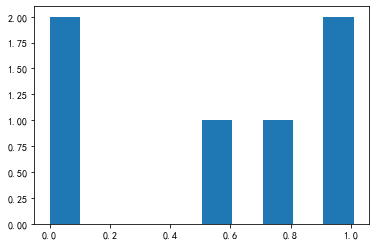

高钾 风化 氧化钙(CaO) p=0.94


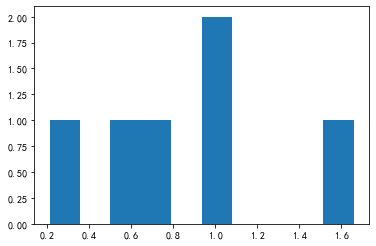

高钾 风化 氧化镁(MgO) p=0.00


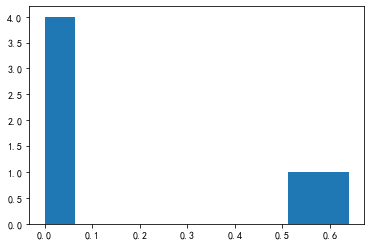

高钾 风化 氧化铝(Al2O3) p=0.79


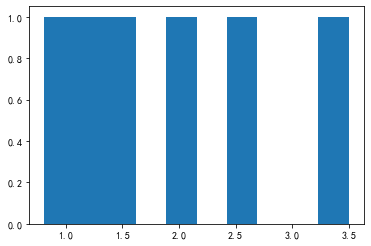

高钾 风化 氧化铁(Fe2O3) p=0.80


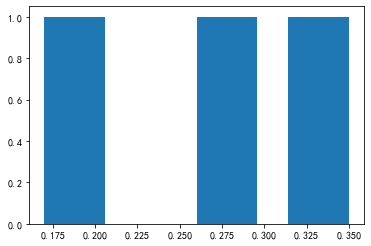

高钾 无风化 二氧化硅(SiO2) p=0.07


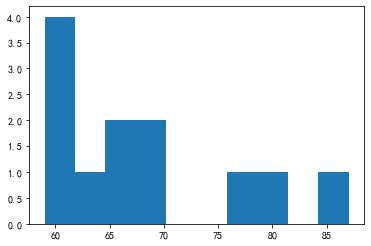

高钾 无风化 氧化钾(K2O) p=0.25


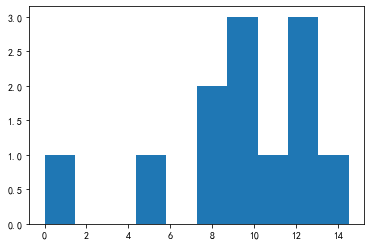

高钾 无风化 氧化钙(CaO) p=0.06


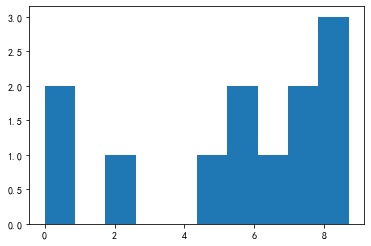

高钾 无风化 氧化镁(MgO) p=0.39


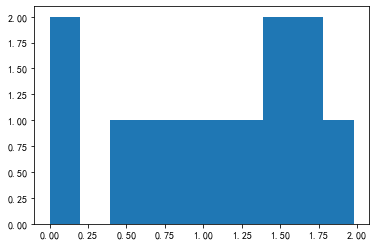

高钾 无风化 氧化铝(Al2O3) p=0.54


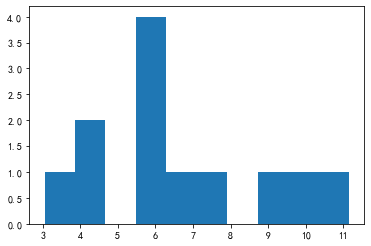

高钾 无风化 氧化铁(Fe2O3) p=0.06


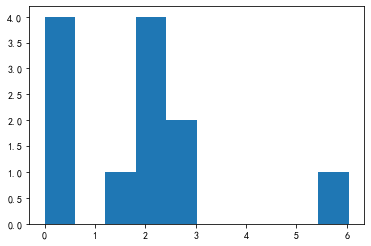

In [123]:
targetMap = {}

for boli_type in configs:
    new_configs = configs[boli_type]
    for fenghua in ["风化", "无风化"]:
        for index in range(len(new_configs["list"])):
            component = new_configs["names"][index]
            volume = new_configs["data"][fenghua][index]
            
            arr = np.array(volume)
            pvalue = shapiro(arr).pvalue
#             if pvalue < 0.05:
#                 print(boli_type, fenghua, component)
#                 print("非正态分布", pvalue)
#                 print(kstest(arr, cdf = "norm"))
#             if pvalue > 0.05:
            print(boli_type, fenghua, component, "p=%.2f" % pvalue)
            plt.hist(arr)
            plt.show()

展示一些符合正态分布的化学成分

In [144]:
expectMap = {
    "铅钡": {},
    "高钾": {}
}

for boli_type in configs:
    new_configs = configs[boli_type]
    for index in range(len(new_configs["list"])):
        component = new_configs["names"][index]
        pvalue = [0, 0]
        mu = [0, 0]
        sigma = [0, 0]
        for i, fenghua in enumerate(["风化", "无风化"]):
            volume = new_configs["data"][fenghua][index]
            
#             print(boli_type, fenghua, component)
#             print(volume)
            arr = np.array(volume)
            pvalue[i] = shapiro(arr).pvalue
            mu[i] = arr.mean()
            sigma[i] = arr.std()
#             if pvalue[i] > 0.05:
#                 print(boli_type, fenghua, component, "mu = %f, sigma = %f" % (mu, sigma))
#                 print("正态分布", pvalue[i])
#                 print()
        print(boli_type, component)
        expectMap[boli_type][component] = {
            "type": "normal_dist",
            "风化": {"mu": mu[0], "sigma": sigma[0]},
            "无风化": {"mu": mu[1], "sigma": sigma[1]},
        }
        
expectMap

铅钡 二氧化硅(SiO2)
铅钡 氧化钠(Na2O)
铅钡 氧化钙(CaO)
铅钡 氧化铅(PbO)
铅钡 五氧化二磷(P2O5)
铅钡 氧化锶(SrO)
高钾 二氧化硅(SiO2)
高钾 氧化钾(K2O)
高钾 氧化钙(CaO)
高钾 氧化镁(MgO)
高钾 氧化铝(Al2O3)
高钾 氧化铁(Fe2O3)


{'铅钡': {'二氧化硅(SiO2)': {'type': 'normal_dist',
   '风化': {'mu': 24.912692307692307, 'sigma': 10.399526083023172},
   '无风化': {'mu': 54.65956521739131, 'sigma': 11.568589210992982}},
  '氧化钠(Na2O)': {'type': 'normal_dist',
   '风化': {'mu': 0.21615384615384617, 'sigma': 0.5458379368039912},
   '无风化': {'mu': 1.682608695652174, 'sigma': 2.3195056021025806}},
  '氧化钙(CaO)': {'type': 'normal_dist',
   '风化': {'mu': 2.6953846153846155, 'sigma': 1.6275470707342448},
   '无风化': {'mu': 1.3204347826086955, 'sigma': 1.2564597547521803}},
  '氧化铅(PbO)': {'type': 'normal_dist',
   '风化': {'mu': 43.31384615384615, 'sigma': 11.992722176682848},
   '无风化': {'mu': 22.084782608695654, 'sigma': 8.034572508075563}},
  '五氧化二磷(P2O5)': {'type': 'normal_dist',
   '风化': {'mu': 5.2773076923076925, 'sigma': 4.115203105271128},
   '无风化': {'mu': 1.0491304347826087, 'sigma': 1.806456808334501}},
  '氧化锶(SrO)': {'type': 'normal_dist',
   '风化': {'mu': 0.4184615384615385, 'sigma': 0.2596994165997462},
   '无风化': {'mu': 0.2682608695

筛选**无风化**且为同种工艺参数：类型，纹饰，颜色的玻璃制品,并记录 **平均值** 

平均值记录在 avgMap 中

In [184]:
# (type, wenshi, color)
avgMap = {}

# 读取文件
vb = openpyxl.load_workbook("C位置标注版.xlsx")
sheet = vb["表单2"]

# 遍历每一行
for row in range(2, 68):
    # 去掉无风化的样本
    if sheet["T"+str(row)].value != "无风化": continue
    
    # 获取类型、纹饰、颜色
    type_ = sheet["R"+str(row)].value
    wenshi = sheet["Q"+str(row)].value
    color = sheet["S"+str(row)].value
    key = (type_, wenshi, color)
    
    # 在avgMap中创建一个表项用于记录 所属的工艺参数
    if key not in avgMap:
        avgMap[key] = {}
        
        # 在每个表项里建立化学成分的新表项
        for i in range(ord("B"), ord("O")+1):
            col = chr(i)
            component = sheet[col+"1"].value
            avgMap[key][component] = {
                "sum": 0,
                "n": 0,
                "avg": 0,
                "lst": [],
            }
    
    # 遍历所有化学成分
    for i in range(ord("B"), ord("O")+1):
        col = chr(i)
        component = sheet[col+"1"].value
        value = sheet[col+str(row)].value
        
        avgMap[key][component]["lst"].append(value)
        avgMap[key][component]["sum"] += value
        avgMap[key][component]["n"] += 1
        
for key in avgMap:
    for component in avgMap[key]:
        avgMap[key][component]["avg"] = avgMap[key][component]["sum"] 
            / avgMap[key][component]["n"]
        del avgMap[key][component]["sum"]

component_names = []
for i in range(ord("B"), ord("O")+1):
    col = chr(i)
    component = sheet[col+"1"].value
    component_names.append(component)
        
print(avgMap)
print(component_names)

{('铅钡', 'A', '黑'): {'二氧化硅(SiO2)': {'n': 2, 'avg': 49.815, 'lst': [54.61, 45.02]}, '氧化钠(Na2O)': {'n': 2, 'avg': 0.0, 'lst': [0, 0]}, '氧化钾(K2O)': {'n': 2, 'avg': 0.15, 'lst': [0.3, 0]}, '氧化钙(CaO)': {'n': 2, 'avg': 2.6, 'lst': [2.08, 3.12]}, '氧化镁(MgO)': {'n': 2, 'avg': 0.87, 'lst': [1.2, 0.54]}, '氧化铝(Al2O3)': {'n': 2, 'avg': 5.33, 'lst': [6.5, 4.16]}, '氧化铁(Fe2O3)': {'n': 2, 'avg': 0.635, 'lst': [1.27, 0]}, '氧化铜(CuO)': {'n': 2, 'avg': 0.575, 'lst': [0.45, 0.7]}, '氧化铅(PbO)': {'n': 2, 'avg': 26.814999999999998, 'lst': [23.02, 30.61]}, '氧化钡(BaO)': {'n': 2, 'avg': 5.205, 'lst': [4.19, 6.22]}, '五氧化二磷(P2O5)': {'n': 2, 'avg': 5.33, 'lst': [4.32, 6.34]}, '氧化锶(SrO)': {'n': 2, 'avg': 0.265, 'lst': [0.3, 0.23]}, '氧化锡(SnO2)': {'n': 2, 'avg': 0.0, 'lst': [0, 0]}, '二氧化硫(SO2)': {'n': 2, 'avg': 0.0, 'lst': [0, 0]}}, ('铅钡', 'A', '蓝绿'): {'二氧化硅(SiO2)': {'n': 1, 'avg': 53.79, 'lst': [53.79]}, '氧化钠(Na2O)': {'n': 1, 'avg': 7.92, 'lst': [7.92]}, '氧化钾(K2O)': {'n': 1, 'avg': 0.0, 'lst': [0]}, '氧化钙(CaO)': {'n': 1, 

In [185]:
avgMap[("高钾", "A", "蓝绿")]

{'二氧化硅(SiO2)': {'n': 7,
  'avg': 68.62285714285714,
  'lst': [87.05, 61.71, 65.88, 61.58, 67.65, 59.81, 76.68]},
 '氧化钠(Na2O)': {'n': 7, 'avg': 0.0, 'lst': [0, 0, 0, 0, 0, 0, 0]},
 '氧化钾(K2O)': {'n': 7,
  'avg': 7.604285714285713,
  'lst': [5.19, 12.37, 9.67, 10.95, 7.37, 7.68, 0]},
 '氧化钙(CaO)': {'n': 7,
  'avg': 4.638571428571429,
  'lst': [2.01, 5.87, 7.12, 7.35, 0, 5.41, 4.71]},
 '氧化镁(MgO)': {'n': 7,
  'avg': 1.3385714285714287,
  'lst': [0, 1.11, 1.56, 1.77, 1.98, 1.73, 1.22]},
 '氧化铝(Al2O3)': {'n': 7,
  'avg': 7.2700000000000005,
  'lst': [4.06, 5.5, 6.44, 7.5, 11.15, 10.05, 6.19]},
 '氧化铁(Fe2O3)': {'n': 7,
  'avg': 2.52,
  'lst': [0, 2.16, 2.06, 2.62, 2.39, 6.04, 2.37]},
 '氧化铜(CuO)': {'n': 7,
  'avg': 2.7557142857142862,
  'lst': [0.78, 5.09, 2.18, 3.27, 2.51, 2.18, 3.28]},
 '氧化铅(PbO)': {'n': 7,
  'avg': 0.4585714285714286,
  'lst': [0.25, 1.41, 0, 0, 0.2, 0.35, 1]},
 '氧化钡(BaO)': {'n': 7,
  'avg': 1.0257142857142856,
  'lst': [0, 2.86, 0, 0, 1.38, 0.97, 1.97]},
 '五氧化二磷(P2O5)': {'n': 

In [204]:
wb = openpyxl.Workbook()
wb.remove(wb["Sheet"])
w_sheet = wb.create_sheet(title="风化前预测值")

# 读表头
for i in range(ord("A"), ord("T")+1):
    col = chr(i)
    table_head = sheet[col+"1"].value
    w_sheet[col+"1"].value = table_head
    
w_sheet["U1"].value = "总值"
    
write_row = 2 # 记录当前写的位置
for read_row in range(2, 69):
    # 跳过没有风化的
    if sheet["T"+str(read_row)].value != "风化":
        continue
    
    type_ = sheet["R"+str(read_row)].value
    wenshi = sheet["Q"+str(read_row)].value
    color = sheet["S"+str(read_row)].value
    key = (type_, wenshi, color)
        
    # 枚举表头:各个化学成分
    for i in range(ord("A"), ord("T")+1):
        col = chr(i)
        table_head = sheet[col+"1"].value
        
        if table_head in component_names:
            # 是化学成分
            if table_head in expectMap[type_]:
                # 风化敏感型变量
                mu = expectMap[type_][table_head]["风化"]["mu"]
                sigma = expectMap[type_][table_head]["风化"]["sigma"]
                mu_ = expectMap[type_][table_head]["无风化"]["mu"]
                sigma_ = expectMap[type_][table_head]["无风化"]["sigma"]
                
                c = sheet[col+str(read_row)].value
                c_ = mu_ + (c - mu) / sigma * sigma_
                expect_val = c_
            else:
                # 风化不敏感型变量，直接取同类的平均
                
                if key in avgMap:
                    # 存在完全相同的未风化类别
                    expect_val = avgMap[key][table_head]["avg"]
                else:
                    print("apply multi average", key)
                    
                    sum_ = 0
                    n = 0
                    for key_new in avgMap:
                        # 需要类型和颜色与当前样本一致的一组无风化样本
                        if key_new[0] == type_ and key_new[2] == color:
                            avg = avgMap[key_new][table_head]["avg"]
                            sum_ += avg * avgMap[key_new][table_head]["n"]
                            n += avgMap[key_new][table_head]["n"]
                            
                    if n == 0:
                        sum_ = 0
                        n = 0
                        for key_new in avgMap:
                            # 需要类型和纹饰与当前样本一致的一组无风化样本
                            if key_new[0] == type_ and key_new[1] == wenshi:
                                avg = avgMap[key_new][table_head]["avg"]
                                sum_ += avg * avgMap[key_new][table_head]["n"]
                                n += avgMap[key_new][table_head]["n"]
                                
                    expect_val = sum_ / n
            
            # 如果预测值小于0，就取0
            if expect_val < 0: expect_val = 0
            
            # 写入预测值
            w_sheet[col+str(write_row)].value = expect_val
            
        else:
            # 非化学成分项：保持与原表相同即可
            w_sheet[col+str(write_row)].value = sheet[col+str(read_row)].value
    
    # 将各种化学成分加和
    sum_ = 0
    for i in range(ord("B"), ord("O")+1):
        col = chr(i)
        sum_ += w_sheet[col+str(write_row)].value
    w_sheet["U"+str(write_row)].value = sum_
    
    write_row += 1

wb.save("风化前预测值.xlsx")
print("已写入文件")

apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'C', '蓝绿')
apply multi average ('铅钡', 'A', None)
apply multi average ('铅钡', 'A', None)
apply multi average ('铅钡', 'A', None)
apply multi average ('铅钡', 'A', None)
apply multi average ('铅钡', 'A', None)
apply multi average ('铅钡', 'A', None)
apply multi average ('铅钡', 'A', None)
apply multi average ('铅钡', 'A', None)
apply multi average ('铅钡', 'A', None)
apply multi average ('铅钡', 'A', None)
apply multi 

In [181]:
avgMap[('高钾', 'A', '蓝绿')]

{'二氧化硅(SiO2)': {'n': 7, 'avg': 68.62285714285714},
 '氧化钠(Na2O)': {'n': 7, 'avg': 0.0},
 '氧化钾(K2O)': {'n': 7, 'avg': 7.604285714285713},
 '氧化钙(CaO)': {'n': 7, 'avg': 4.638571428571429},
 '氧化镁(MgO)': {'n': 7, 'avg': 1.3385714285714287},
 '氧化铝(Al2O3)': {'n': 7, 'avg': 7.2700000000000005},
 '氧化铁(Fe2O3)': {'n': 7, 'avg': 2.52},
 '氧化铜(CuO)': {'n': 7, 'avg': 2.7557142857142862},
 '氧化铅(PbO)': {'n': 7, 'avg': 0.4585714285714286},
 '氧化钡(BaO)': {'n': 7, 'avg': 1.0257142857142856},
 '五氧化二磷(P2O5)': {'n': 7, 'avg': 1.8385714285714285},
 '氧化锶(SrO)': {'n': 7, 'avg': 0.055714285714285716},
 '氧化锡(SnO2)': {'n': 7, 'avg': 0.0},
 '二氧化硫(SO2)': {'n': 7, 'avg': 0.11857142857142856}}

手动的模拟预测

In [131]:
# 铅钡 风化 二氧化硅(SiO2) mu = 24.912692, sigma = 10.399526
# 铅钡 无风化 二氧化硅(SiO2) mu = 54.659565, sigma = 11.568589
mu = 24.912692
sigma = 10.399526
mu_ = 54.659565
sigma_ = 11.568589

c = 32.93
c_ = mu_ + (c - mu) / sigma * sigma_
c_

63.57813889831152

In [134]:
# 铅钡 氧化铅 前mu = 43.313846, sigma = 11.992722
# 后mu = 22.084783, sigma = 8.034573
mu = 43.313846
sigma = 11.992722
mu_ = 22.084783
sigma_ = 8.034573

c = 55.46
c_ = mu_ + (c - mu) / sigma * sigma_
c_

30.222148393964943

In [136]:
# 高钾 风化 二氧化硅(SiO2) mu = 93.963333, sigma = 1.582568
# 高钾 无风化 二氧化硅(SiO2) mu = 67.984167, sigma = 8.382369
mu = 93.963333
sigma = 1.582568
mu_ = 67.984167
sigma_ = 8.382369

c = 96.77
c_ = mu_ + (c - mu) / sigma * sigma_
c_

82.85020653455581

In [64]:
import statsmodels.api as sm

C:\Users\21104\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_continuous_distns.py:4530: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


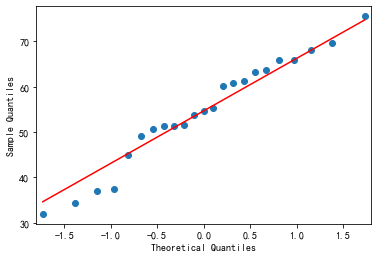

In [65]:
import pylab
arr = np.array(volume)
sm.qqplot(arr, line='s')
pylab.show()
# 生成Q-Q图

柯尔莫戈洛夫-斯米诺夫检验（Kolmogorov-Smirnov test），一般又称K-S检验.
用以检验两个经验分布是否不同或一个经验分布与另一个理想分布是否不同。

In [68]:
kstest(arr, cdf = "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [72]:
# 大于0.05，说明该分布符合正态分布
# 返回两个值，分别是检验统计量和P值
shapiro_res = shapiro(arr)
type(shapiro_res)

scipy.stats.morestats.ShapiroResult

C:\Users\21104\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_continuous_distns.py:4530: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


[[-1.09540881 -1.79602419 -3.00879175 -0.83349552  1.01900026  0.3639996
  -2.94053378  0.19803405  1.44590205  3.03983031]]
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 6.98431] [loc=-0.361 scale=1.846]
[distfit] >[expon     ] [0.0 sec] [RSS: 6.86702] [loc=-3.009 scale=2.648]
[distfit] >[pareto    ] [0.08 sec] [RSS: 6.83331] [loc=-4.193 scale=1.184]
[distfit] >[dweibull  ] [0.06 sec] [RSS: 6.85373] [loc=-0.351 scale=1.775]
[distfit] >[t         ] [0.15 sec] [RSS: 6.98431] [loc=-0.361 scale=1.846]
[distfit] >[genextreme] [0.14 sec] [RSS: 6.98056] [loc=-1.030 scale=1.786]
[distfit] >[gamma     ] [0.14 sec] [RSS: 6.98733] [loc=-13.978 scale=0.251]
[distfit] >[lognorm   ] [0.06 sec] [RSS: 6.99165] [loc=-16.195 scale=15.727]
[distfit] >[beta      ] [0.20 sec] [RSS: 6.00455] [loc=-3.009 scale=6.701]
[distfit] >[uniform   ] [0.0 sec] [RSS: 6.83325] [loc=-3.009 scale=6.049]
[distfit] >[loggamma  ] [0.10 sec] [RSS: 6.98142] [loc=-498.143 scale=68.908]
[distf

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nbeta\nRSS(a=0.548239, b=0.891197, loc=-3.00879, scale=6.70132)'}, xlabel='Values', ylabel='Frequency'>)

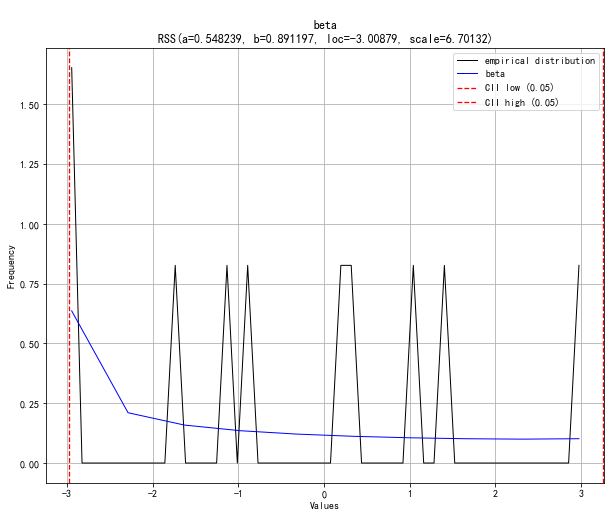

In [85]:
from distfit import distfit
import numpy as np
X = np.random.normal(0, 2, [1,10])
print(X)
y = [-8,-6,0,1,2,3,4,5,6]
dist = distfit(todf=True)
dist.fit_transform(X)
dist.plot()